In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

scene_path = './data/input1.jpg'
mask_path = './data/input1_mask.jpg'
compl_path = './data/result_img007.jpg'

(600, 800)
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]


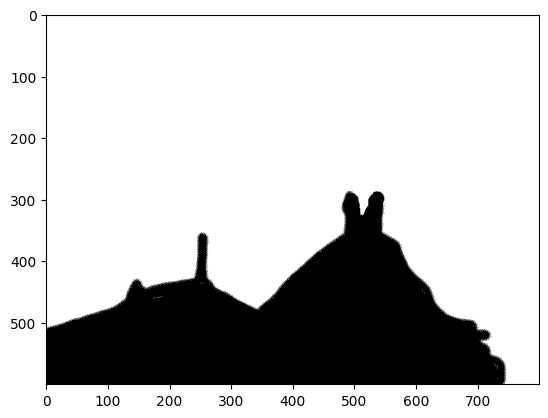

In [22]:
mask_im = np.asarray(Image.open(mask_path).convert('1'))
plt.imshow(mask_im, cmap='gray')
print(mask_im.shape)
print(mask_im[:5, :5])

In [45]:
from main import vicinity_via_bfs

vicinity_via_bfs(Image.open(mask_path), 80)

test


In [15]:
tmp = (mask_im == [[[255, 255, 255]]])
tmp.shape

(600, 800, 3)

In [32]:
xs, ys = np.where(np.array([[True, False, True], [True, False, False]]) == True)
q = np.concatenate((xs.reshape(-1, 1), ys.reshape(-1, 1)), axis=1).tolist()
print(q)
print(type(q))

[[0, 0], [0, 2], [1, 0]]
<class 'list'>


In [35]:
q.pop()

[1, 0]

In [36]:
q

[[0, 2]]

In [37]:
list(zip([0, 1, 2], [2, 1, 0]))

[(0, 2), (1, 1), (2, 0)]

In [43]:
np.where(np.array([True, False, True]) == False)

(array([1]),)

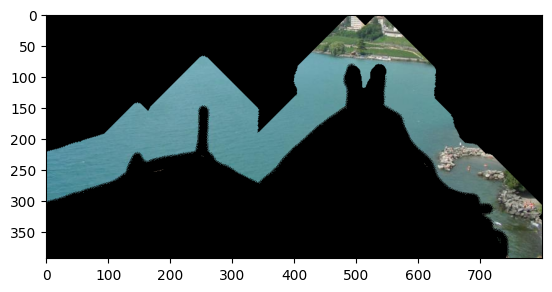

In [79]:
import main
import importlib
importlib.reload(main)

vici_np = main.vicinity_via_bfs(Image.open(mask_path), 80)
crop_np = main.crop(Image.open(scene_path), vici_np)
plt.imshow(crop_np)

Resampling.NEAREST


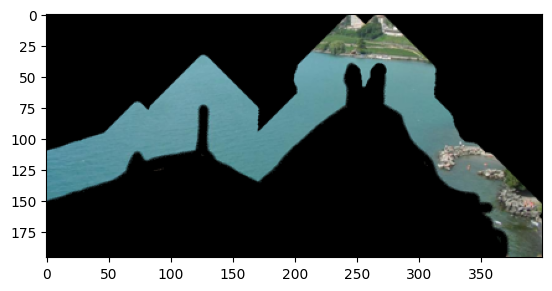

In [114]:
import PIL
print(Image.Resampling.NEAREST)
plt.imshow(Image.fromarray(np.uint8(crop_np)).resize((int(crop_np.shape[1] / 2), int(crop_np.shape[0] / 2))))

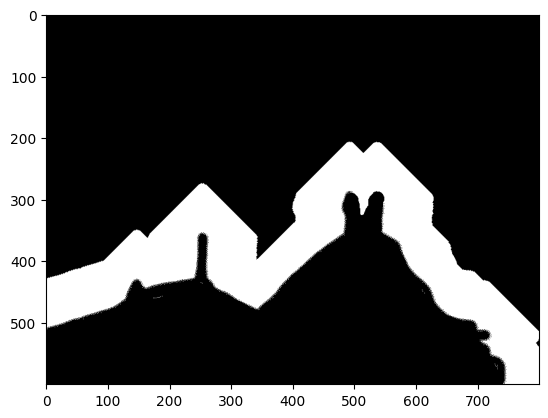

In [113]:
import matplotlib.pyplot as plt

plt.imshow(vici, cmap='gray')

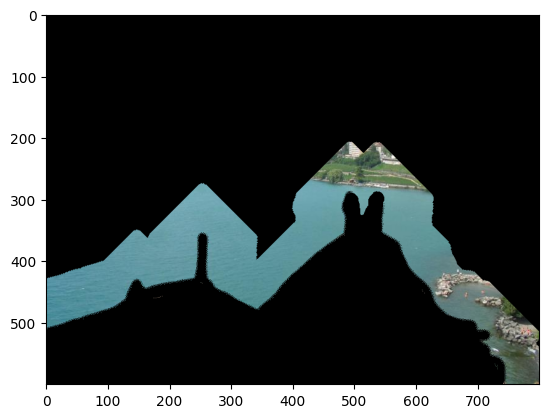

In [77]:
vici_np = np.expand_dims(vici, axis=2)
scene_np = np.asarray(Image.open(scene_path))
crop_np = vici_np * scene_np
plt.imshow(crop_np)

In [6]:
import jittor as jt

a = jt.arange(0, 10)
x = a.reindex([20], ['i0 / 2'])
print(x)

jt.Var([0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9], dtype=int32)


In [1]:
import main
import importlib
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
importlib.reload(main)

scene_path = './data/input1.jpg'
mask_path = './data/input1_mask.jpg'
comp_path = './data/input1/result_img007.jpg'

vici_np = main.vicinity_via_bfs(Image.open(mask_path), 80)
crop_np = main.crop(Image.open(scene_path), vici_np)

[i 1226 14:20:10.725358 28 log.cc:351] Load log_sync: 1
[i 1226 14:20:10.868552 28 compiler.py:955] Jittor(1.3.6.5) src: /usr/local/miniconda3/envs/scene/lib/python3.7/site-packages/jittor
[i 1226 14:20:10.878775 28 compiler.py:956] g++ at /usr/bin/g++(9.3.0)
[i 1226 14:20:10.880447 28 compiler.py:957] cache_path: /root/.cache/jittor/jt1.3.6/g++9.3.0/py3.7.15/Linux-5.4.0-13x06/IntelRXeonRCPUx6e/default
[i 1226 14:20:10.890895 28 __init__.py:411] Found nvcc(11.3.109) at /usr/local/cuda/bin/nvcc.
[i 1226 14:20:10.901743 28 __init__.py:411] Found addr2line(2.34) at /usr/bin/addr2line.
[i 1226 14:20:11.073626 28 compiler.py:1010] cuda key:cu11.3.109_sm_86
[i 1226 14:20:11.469035 28 __init__.py:227] Total mem: 62.65GB, using 16 procs for compiling.
[i 1226 14:20:11.693140 28 jit_compiler.cc:28] Load cc_path: /usr/bin/g++
[i 1226 14:20:11.849842 28 init.cc:62] Found cuda archs: [86,]
[i 1226 14:20:11.882484 28 compile_extern.py:519] mpicc not found, distribution disabled.


In [9]:
importlib.reload(main)

error_np = main.conv(crop_np, 1.0, Image.open(comp_path))
print(error_np.shape, error_np.min(), error_np.max())

(376, 225) 12830131000.0 19906060000.0


In [11]:
importlib.reload(main)

x, y, err = main.conv(crop_np, 1.0, Image.open(comp_path))
print(x, y, err)

319 0 12830131000.0


In [ ]:
import matplotlib.pyplot as plt

comp_np = np.asarray(Image.open(comp_path))
h, w = crop_np.shape[:2]
plt.imshow(comp_np[x:x+h, y:y+w])

In [9]:
print(conv_np.max(), conv_np.min())

19913210000.0 12837479000.0


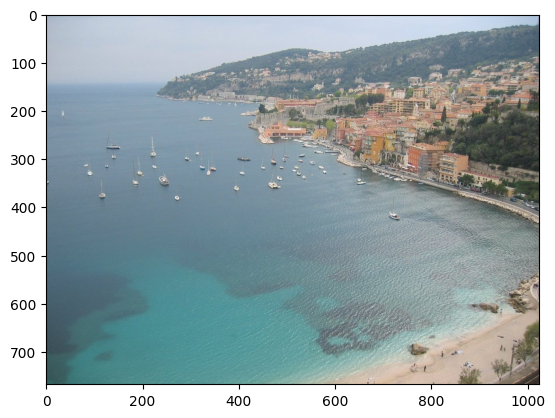

In [16]:
comp_np = np.asarray(Image.open(comp_path))
plt.imshow(comp_np)

In [2]:
import jittor as jt
import importlib
import numpy as np
import main
from PIL import Image
importlib.reload(main)

if jt.has_cuda:
    jt.flags.use_cuda = 1
print(jt.compiler.has_cuda)
print(jt.flags.use_cuda)

scene_path = './data/input1.jpg'
mask_path = './data/input1_mask.jpg'
comp_path = './data/input1/result_img007.jpg'

vici_np = main.vicinity_via_bfs(Image.open(mask_path), 80)
crop_np = main.crop(Image.open(scene_path), vici_np)
comp_np = np.asarray(Image.open(comp_path))
print(comp_np.shape)
print(crop_np.shape)

[i 1226 15:11:27.864868 60 log.cc:351] Load log_sync: 1
[i 1226 15:11:27.873595 60 compiler.py:955] Jittor(1.3.6.5) src: /usr/local/miniconda3/envs/scene/lib/python3.7/site-packages/jittor
[i 1226 15:11:27.882024 60 compiler.py:956] g++ at /usr/bin/g++(9.3.0)
[i 1226 15:11:27.883651 60 compiler.py:957] cache_path: /root/.cache/jittor/jt1.3.6/g++9.3.0/py3.7.15/Linux-5.4.0-13x06/IntelRXeonRCPUx6e/default
[i 1226 15:11:27.893288 60 __init__.py:411] Found nvcc(11.3.109) at /usr/local/cuda/bin/nvcc.
[i 1226 15:11:27.904360 60 __init__.py:411] Found addr2line(2.34) at /usr/bin/addr2line.
[i 1226 15:11:28.064824 60 compiler.py:1010] cuda key:cu11.3.109_sm_86
[i 1226 15:11:28.469982 60 __init__.py:227] Total mem: 62.65GB, using 16 procs for compiling.
[i 1226 15:11:28.684400 60 jit_compiler.cc:28] Load cc_path: /usr/bin/g++
[i 1226 15:11:28.842291 60 init.cc:62] Found cuda archs: [86,]
[i 1226 15:11:29.148727 60 compile_extern.py:519] mpicc not found, distribution disabled.
[i 1226 15:11:31.02

1
1
(768, 1024, 3)
(393, 800, 3)


In [4]:
[h1, w1, _] = comp_np.shape
[h2, w2, _] = crop_np.shape
comp_conv_np = jt.array(comp_np, dtype=jt.float32).reindex([h1 - h2 + 1, w1 - w2 + 1, h2, w2, 3], ['i0 + i2', 'i1 + i3', 'i4'])
crop_conv_np = jt.array(crop_np, dtype=jt.float32).broadcast_var(comp_conv_np)
print(comp_conv_np.shape, comp_conv_np.dtype)
print(crop_conv_np.shape, crop_conv_np.dtype)
error_np = (comp_conv_np - crop_conv_np) ** 2
error_np = error_np.sum([2, 3, 4])
print(error_np.shape, error_np.max(), error_np.min())


Compiling Operators(1/1) used: 5.29s eta:    0s 


[376,225,393,800,3,] float32
[376,225,393,800,3,] float32
[376,225,] jt.Var([1.990606e+10], dtype=float32) jt.Var([1.2830131e+10], dtype=float32)


In [5]:
error_np = error_np.fetch_sync()
print(error_np)

[[1.9904530e+10 1.9905006e+10 1.9905432e+10 ... 1.8105676e+10
  1.8089038e+10 1.8071560e+10]
 [1.9864154e+10 1.9863996e+10 1.9865061e+10 ... 1.8056153e+10
  1.8039030e+10 1.8021343e+10]
 [1.9824206e+10 1.9825005e+10 1.9825408e+10 ... 1.8006673e+10
  1.7989042e+10 1.7971188e+10]
 ...
 [1.3128629e+10 1.3144153e+10 1.3159886e+10 ... 1.5331613e+10
  1.5332659e+10 1.5332819e+10]
 [1.3137162e+10 1.3153587e+10 1.3169063e+10 ... 1.5346739e+10
  1.5348049e+10 1.5347785e+10]
 [1.3146397e+10 1.3162758e+10 1.3178630e+10 ... 1.5361973e+10
  1.5363356e+10 1.5364270e+10]]


In [6]:
print(error_np[:10, :10])

[[1.9904530e+10 1.9905006e+10 1.9905432e+10 1.9906060e+10 1.9905534e+10
  1.9905147e+10 1.9904236e+10 1.9902933e+10 1.9903201e+10 1.9902859e+10]
 [1.9864154e+10 1.9863996e+10 1.9865061e+10 1.9866311e+10 1.9865819e+10
  1.9866014e+10 1.9865772e+10 1.9864037e+10 1.9863685e+10 1.9863560e+10]
 [1.9824206e+10 1.9825005e+10 1.9825408e+10 1.9826293e+10 1.9826680e+10
  1.9826536e+10 1.9826414e+10 1.9825848e+10 1.9824980e+10 1.9824278e+10]
 [1.9784841e+10 1.9785830e+10 1.9786107e+10 1.9786365e+10 1.9786021e+10
  1.9786469e+10 1.9786385e+10 1.9785724e+10 1.9785378e+10 1.9784288e+10]
 [1.9747297e+10 1.9747514e+10 1.9747068e+10 1.9747052e+10 1.9745974e+10
  1.9745718e+10 1.9746513e+10 1.9745853e+10 1.9745700e+10 1.9744141e+10]
 [1.9709536e+10 1.9709690e+10 1.9708803e+10 1.9708426e+10 1.9707230e+10
  1.9706001e+10 1.9706341e+10 1.9705260e+10 1.9704695e+10 1.9702751e+10]
 [1.9671034e+10 1.9670753e+10 1.9670196e+10 1.9669651e+10 1.9668115e+10
  1.9666362e+10 1.9665957e+10 1.9664873e+10 1.9664140e+10 